In [1]:
import sys
sys.path.append('/home/michael/jupyter/local-packages')

from localUtilities import dateUtils

import pandas as pd

import datetime

# Save the data
from pathlib import Path

theBaseCompaniesDirectory = '/home/michael/jupyter/earningDateData/Companies/'
csvSuffix = '.csv'
excelSuffix = '.xlxs'

startday = '2020-01-06' 

# Get saved data
companyEarningsWeek = startday + '/'
companyListFile = 'SummaryWeekOf-' + startday + excelSuffix
x = theBaseCompaniesDirectory + companyEarningsWeek
earningWeekDir = Path(x)

excelEarningsDateDF =  pd.read_excel('/home/michael/jupyter/earningDateData/Companies/2020-01-06/SummaryWeekOf-2020-01-06.xlsx', 'PSMT')

excelCurrentEarningsDateDF = excelEarningsDateDF.iloc[0:1,]
excelPastEarningsDateDF = excelEarningsDateDF.iloc[2:,]

headers = excelPastEarningsDateDF.iloc[0]
excelPastEarningsDateDF  = pd.DataFrame(excelPastEarningsDateDF.values[1:], columns=headers)

excelPastEarningsDateDF.reindex


<bound method DataFrame.reindex of nan Symbol        Earnings_Date         Company EPS_Estimate Reported_EPS  \
0     PSMT  2019-10-29 20:00:00  PriceSmart Inc         0.49         0.67   
1     PSMT  2019-07-10 20:00:00  PriceSmart Inc         0.46         0.46   
2     PSMT  2019-04-09 20:00:00  PriceSmart Inc         0.67         0.79   
3     PSMT  2019-01-09 21:00:00  PriceSmart Inc         0.67         0.48   
4     PSMT  2018-10-25 22:00:00  PriceSmart Inc         0.67         0.62   
5     PSMT  2018-07-03 20:00:00  PriceSmart Inc         0.63         0.61   
6     PSMT  2018-04-06 00:00:00  PriceSmart Inc         0.74         0.47   
7     PSMT  2018-01-04 21:00:00  PriceSmart Inc         0.85         0.74   
8     PSMT  2017-10-26 20:00:00  PriceSmart Inc         0.73         0.64   
9     PSMT  2017-07-05 20:00:00  PriceSmart Inc         0.67         0.62   
10    PSMT  2017-04-06 20:00:00  PriceSmart Inc         0.92          0.9   

nan Surprise(%)   High   Open  Volume   

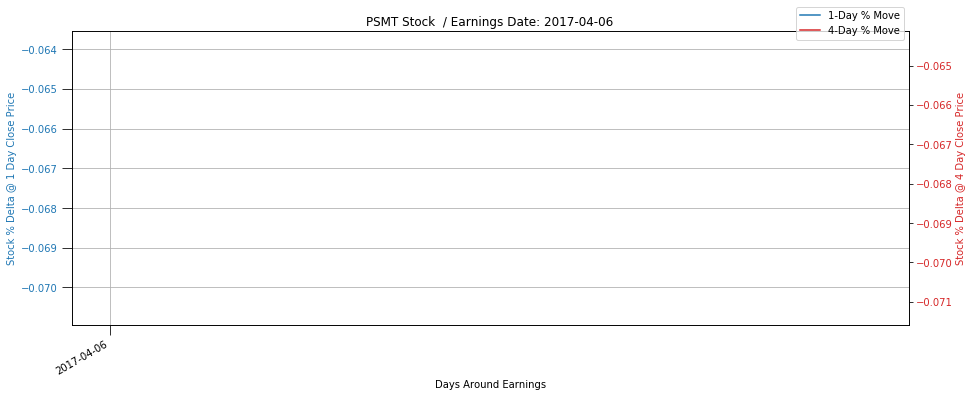

In [4]:
import itertools
from IPython.display import display, HTML

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.dates import AutoDateFormatter, AutoDateLocator

colorStock = 'tab:blue'
colorImpVol = 'tab:red'
xLabel = 'Days Around Earnings'
yLabel1DayStockMove = 'Stock % Delta @ 1 Day Close Price';
yLabel4DayStockMove = 'Stock % Delta @ 4 Day Close Price';
ax1LegendLabel = "1-Day % Move"
ax2LegendLabel = "4-Day % Move"

# mdates.AutoDateLocator(minticks=0, maxticks=5)
# formatter = mdates.ConciseDateFormatter(locator)
#locator = AutoDateLocator()
# formatter = AutoDateFormatter(locator)
locator = mdates.AutoDateLocator(minticks=1, maxticks=5)
# locator.intervald[3] = [1] 
formatter = mdates.ConciseDateFormatter(locator)
myFmt = DateFormatter("%b-%d-%Y")

# single Plot
theStock = excelPastEarningsDateDF.iloc[0,0]
fig, ax1 = plt.subplots(figsize=(15,6)); 

#     display(listOfEarningDeltas[earn]) #to show Deltas
for earn in range(10, len(excelPastEarningsDateDF)): # for all the dates in earningsCalendar

    earningDateString = excelPastEarningsDateDF['Earnings_Date'][earn]
    earningDateString = earningDateString[:10]
    
    theTitle = theStock + " Stock "+ " / Earnings Date: " + earningDateString
    impVolDataHeaderStockString = '<hr> <strong><span style="color: #ff0000; font-family: arial, helvetica, sans-serif; font-size: large;"> ' + theStock 

    dataHeaderEarningDateString = '<br></span></strong><span style="font-size: small; color: #008000;"><strong><span style="font-family: arial, helvetica, sans-serif;">Earning Date &#9884 ' \
    + earningDateString + '<hr> '
    
    impVolDataHeader = impVolDataHeaderStockString  + ' &#9830; ImpVol ' + dataHeaderEarningDateString
    
    priceHeaderDataHeaderStockString = '<hr> <strong><span style="color: blue; font-family: arial, helvetica, sans-serif; font-size: large;"> ' + theStock 

    priceHeader = priceHeaderDataHeaderStockString  + ' &#9830; Price ' + dataHeaderEarningDateString

#    display(HTML(priceHeader))

#     display(onEarningDatePastdf)
    ax1.set_title(theTitle);

    #display(excelPastEarningsDateDF.EDFwd1DayClosePercentDelta[earn], excelPastEarningsDateDF['Earnings_Date'][earn])
   
    ax1.set_xlabel(xLabel);
    ax1.set_ylabel(yLabel1DayStockMove, color=colorStock);
    ax1.plot(earningDateString, excelPastEarningsDateDF.EDFwd1DayClosePercentDelta[earn], color=colorStock, label=ax1LegendLabel);
    ax1.tick_params(axis='y', labelcolor=colorStock);
    ax1.grid(True);       
    
# instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx();
    ax2.set_ylabel(yLabel4DayStockMove, color=colorImpVol)  # we already handled the x-label with ax1

    ax2.plot(earningDateString, excelPastEarningsDateDF.EDFwd4DayClosePercentDelta[earn], color=colorImpVol, label=ax2LegendLabel)
    ax2.tick_params(axis='y', labelcolor=colorImpVol)

    #build Legend for 2 Xaxis
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1.0, 1.1))
 
         #set up Major/Minor xAxis 
    # ax1.xaxis.set_major_locator(locator)
    # ax1.xaxis.set_major_formatter(formatter)
        # Format xAxis Date
    # ax1.xaxis.set_major_formatter(myFmt)
    ax1.tick_params(which='major', length=10)
    ax1.tick_params(which='minor', length=4, color='b')
    # # ax1.xaxis.set_minor_locator(AutoMinorLocator())
    
    ax1.axvspan(mdates.date2num(dateUtils.getDateFromISO8601(excelPastEarningsDateDF.Earnings_Date[earn])),
                mdates.date2num(dateUtils.getDateFromISO8601(excelPastEarningsDateDF.Earnings_Date[earn])+datetime.timedelta(days=1)),
                facecolor='g', alpha=0.5)
    ax1.axvspan(mdates.date2num(dateUtils.getDateFromISO8601(excelPastEarningsDateDF.Earnings_Date[earn])+datetime.timedelta(days=3)),
                mdates.date2num(dateUtils.getDateFromISO8601(excelPastEarningsDateDF.Earnings_Date[earn])+datetime.timedelta(days=10)),
                facecolor='aqua', alpha=0.5)
    
    fig.autofmt_xdate()
    plt.show()
#     display(listOfEarningDeltas[earn]) #to show Deltas